<a href="https://colab.research.google.com/github//pawel717-SCGE/lab1/blob/master/lab1-SCGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>
Szeregi czasowe
</h1>
<h2>
Sprawozdanie z laboratorium
</h2>
</center>

<p style="text-align: right">
    <b><i>Wykonali:</i></b><br>
<i>Paweł Suchanicz</i><br>
<i>Elżbieta Dziedzic</i>
</p>


# LAB 2
## Notowania kryptowalut

Wczytanie danych dotyczących nototwań kryptowaluty Bitcoin(BTC) w stosunku do dolara ameykańskiego(USD):

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
df_btcusd = pd.read_csv('Bitfinex_BTCUSD_1h.csv', index_col='Date')
df_btcusd

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2020-04-01 11-AM,BTCUSD,6310.00,6310.1,6293.4,6294.10,23.41,147569.08
2020-04-01 10-AM,BTCUSD,6315.70,6340.2,6308.9,6310.00,66.12,418085.75
2020-04-01 09-AM,BTCUSD,6328.10,6334.2,6290.7,6315.70,351.88,2218333.79
2020-04-01 08-AM,BTCUSD,6344.49,6345.6,6305.1,6328.10,117.64,743604.16
2020-04-01 07-AM,BTCUSD,6318.20,6355.9,6308.5,6344.49,95.89,607652.91
...,...,...,...,...,...,...,...
2017-10-09 01-PM,BTCUSD,4595.50,4621.0,4585.1,4617.20,1196.97,5515389.68
2017-10-09 12-PM,BTCUSD,4603.00,4610.0,4585.0,4595.50,570.88,2625211.20
2017-10-09 11-AM,BTCUSD,4594.90,4618.0,4594.9,4603.00,738.14,3401164.60


In [2]:
df_btcusd.describe()

,Open,High,Low,Close,Volume BTC,Volume USD
count,21723.000000,21723.000000,21723.000000,21723.000000,21723.000000,2.172300e+04
mean,7768.209977,7815.329199,7718.149434,7768.298101,979.277916,8.063218e+06
std,2711.718758,2743.949160,2675.555842,2711.680826,1439.434039,1.284417e+07
min,3229.800000,3247.100000,3215.200000,3229.800000,0.000000,0.000000e+00
25%,6260.750000,6295.000000,6231.350000,6261.150000,184.335000,1.251194e+06
50%,7526.200000,7560.500000,7489.200000,7526.200000,492.900000,3.340403e+06
75%,9310.720000,9353.950000,9265.900000,9310.720000,1196.930000,9.179411e+06
max,19796.000000,19891.000000,19684.000000,19796.000000,33263.450000,2.541797e+08


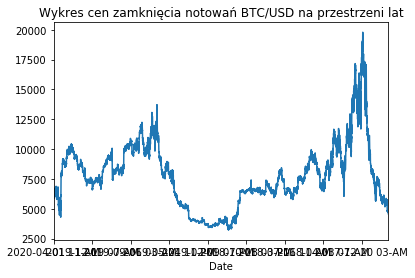

In [3]:
df_btcusd_close = df_btcusd['Close']
df_btcusd_close.plot(title='Wykres cen zamknięcia notowań BTC/USD na przestrzeni lat')

Na wykresie znajduje się kilka lokalnych trendów.

Wyliczamy fluktuacje (zmiany) w cenach zamknięcia notowań jako różnica wartości obecnej i poprzeniego notowania.

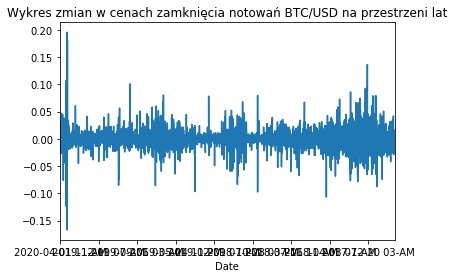

In [4]:
btdusd_rets = df_btcusd_close / df_btcusd_close.shift(1) - 1
btdusd_rets.plot(title='Wykres zmian w cenach zamknięcia notowań BTC/USD na przestrzeni lat')

Wyliczamy także logarytmiczne stopy zwrotu:

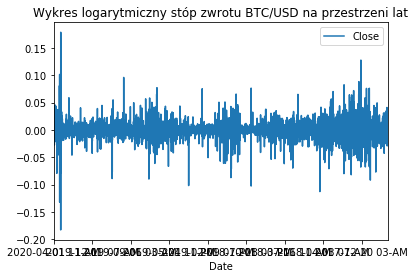

In [5]:
df_btdusd_change = pd.DataFrame(df_btcusd_close).apply(lambda x: np.log(x) - np.log(x.shift(1))) 
df_btdusd_change.describe()
df_btdusd_change.plot(title='Wykres logarytmiczny stóp zwrotu BTC/USD na przestrzeni lat')

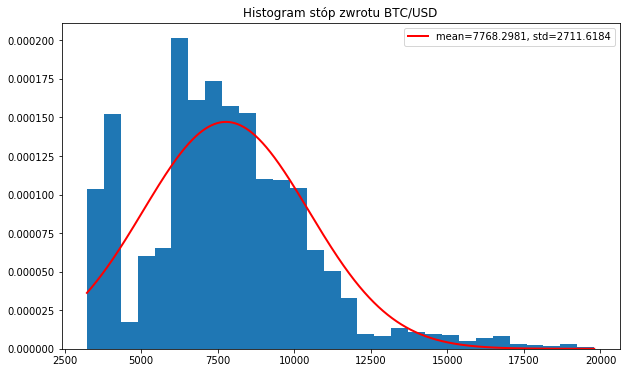

In [6]:
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(10, 6))


loc, scale = stats.norm.fit(df_btcusd_close) 
x = np.linspace(df_btcusd_close.min(), df_btcusd_close.max(), len(df_btcusd_close))
pdf = stats.norm.pdf(x, loc=loc, scale=scale) 
label = 'mean=%.4f, std=%.4f' % (loc, scale)
ax.set_title("Histogram stóp zwrotu BTC/USD")
ax.hist(df_btcusd_close, bins=30, density=True)
ax.plot(x, pdf, 'r-', lw=2, label=label)
ax.legend(loc='best')

Prawa strona histogramu częściowo układa się w sposób zbliżony do rozkładu normalnego, jego lewa strona zupełnie od niego odbiega, występują maksima wykraczające poza rozkład normalny.

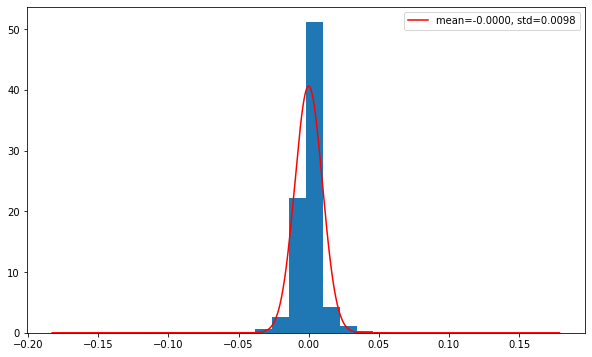

In [7]:
values = df_btdusd_change['Close'][1:]  # skip first NA value
x = np.linspace(values.min(), values.max(), len(values))

loc, scale = stats.norm.fit(values)
param_density = stats.norm.pdf(x, loc=loc, scale=scale)
label = 'mean=%.4f, std=%.4f' % (loc, scale)
ax.set_title("Histogram loagrytmicznych stóp zwrotu BTC/USD")
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(values, bins=30, density=True)
ax.plot(x, param_density, 'r-', label=label)
ax.legend(loc='best')

Histogram jest zbliżony do rozkładu normalnego, jednak bardziej przechylony na prawo i wykraczający poza maksumum rozkładu.

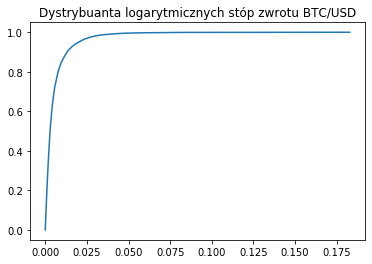

In [8]:
from statsmodels.distributions.empirical_distribution import ECDF
values = df_btdusd_change['Close'][1:]  # skip first NA value

ecdf = ECDF(abs(values))
plt.plot(ecdf.x, ecdf.y)
plt.title("Dystrybuanta logarytmicznych stóp zwrotu BTC/USD")
plt.show()

Dystrybuanta empiryczna jest zbliżona do teoretycznej. W górnej części wykresu najbardziej od niej odbiega.

### Autokorelacja

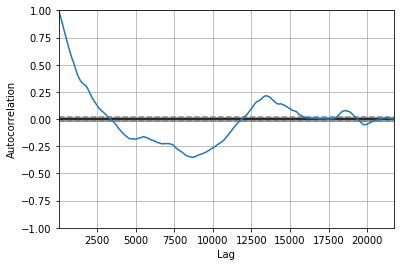

In [9]:
pd.plotting.autocorrelation_plot(df_btcusd['Close'])

Z wykresu autokorelacji wynika, że w szeregu występują zależności. 

(-0.1, 0.1)

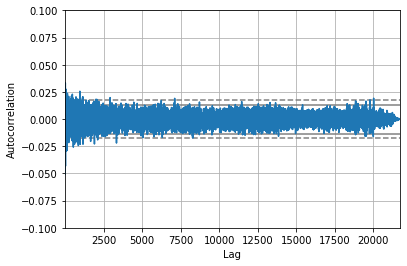

In [10]:
ax = pd.plotting.autocorrelation_plot(df_btdusd_change['Close'][1:])
ax.set_ylim([-0.1, 0.1])

**Autokorelacja dla wymieszanych danych**

Mieszając dane w sposób losowy usuwamy korelację między danymi, dlatego w wyniku otrzymany wykres autokorelacji jest linią prostą y=0 (autokorelacja wynosi 0)

(-0.1, 0.1)

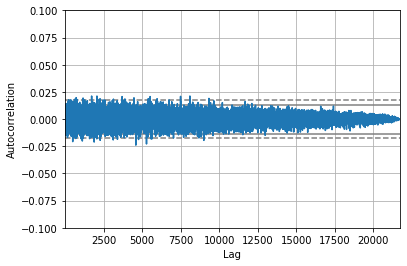

In [11]:
shuffled = sklearn.utils.shuffle(df_btcusd)
ax = pd.plotting.autocorrelation_plot(shuffled['Close'])
ax.set_ylim([-0.1, 0.1])